# Basic_analysis

### Preprocessing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 파라미터 설정
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지는 문제 해결

df = pd.read_csv('data/jp_program.csv', encoding='utf-8')

# Remove unwanted columns
df.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', '종합 순위', '장르별 순위'], inplace=True)

# Convert '방영일' to datetime
df['방영일'] = pd.to_datetime(df['방영일'], format='%Y.%m.%d')

# Remove '%' from '시청률' and convert to float
df['시청률'] = df['시청률'].str.rstrip('%').astype(float)

### 방송사별 시청률 추이

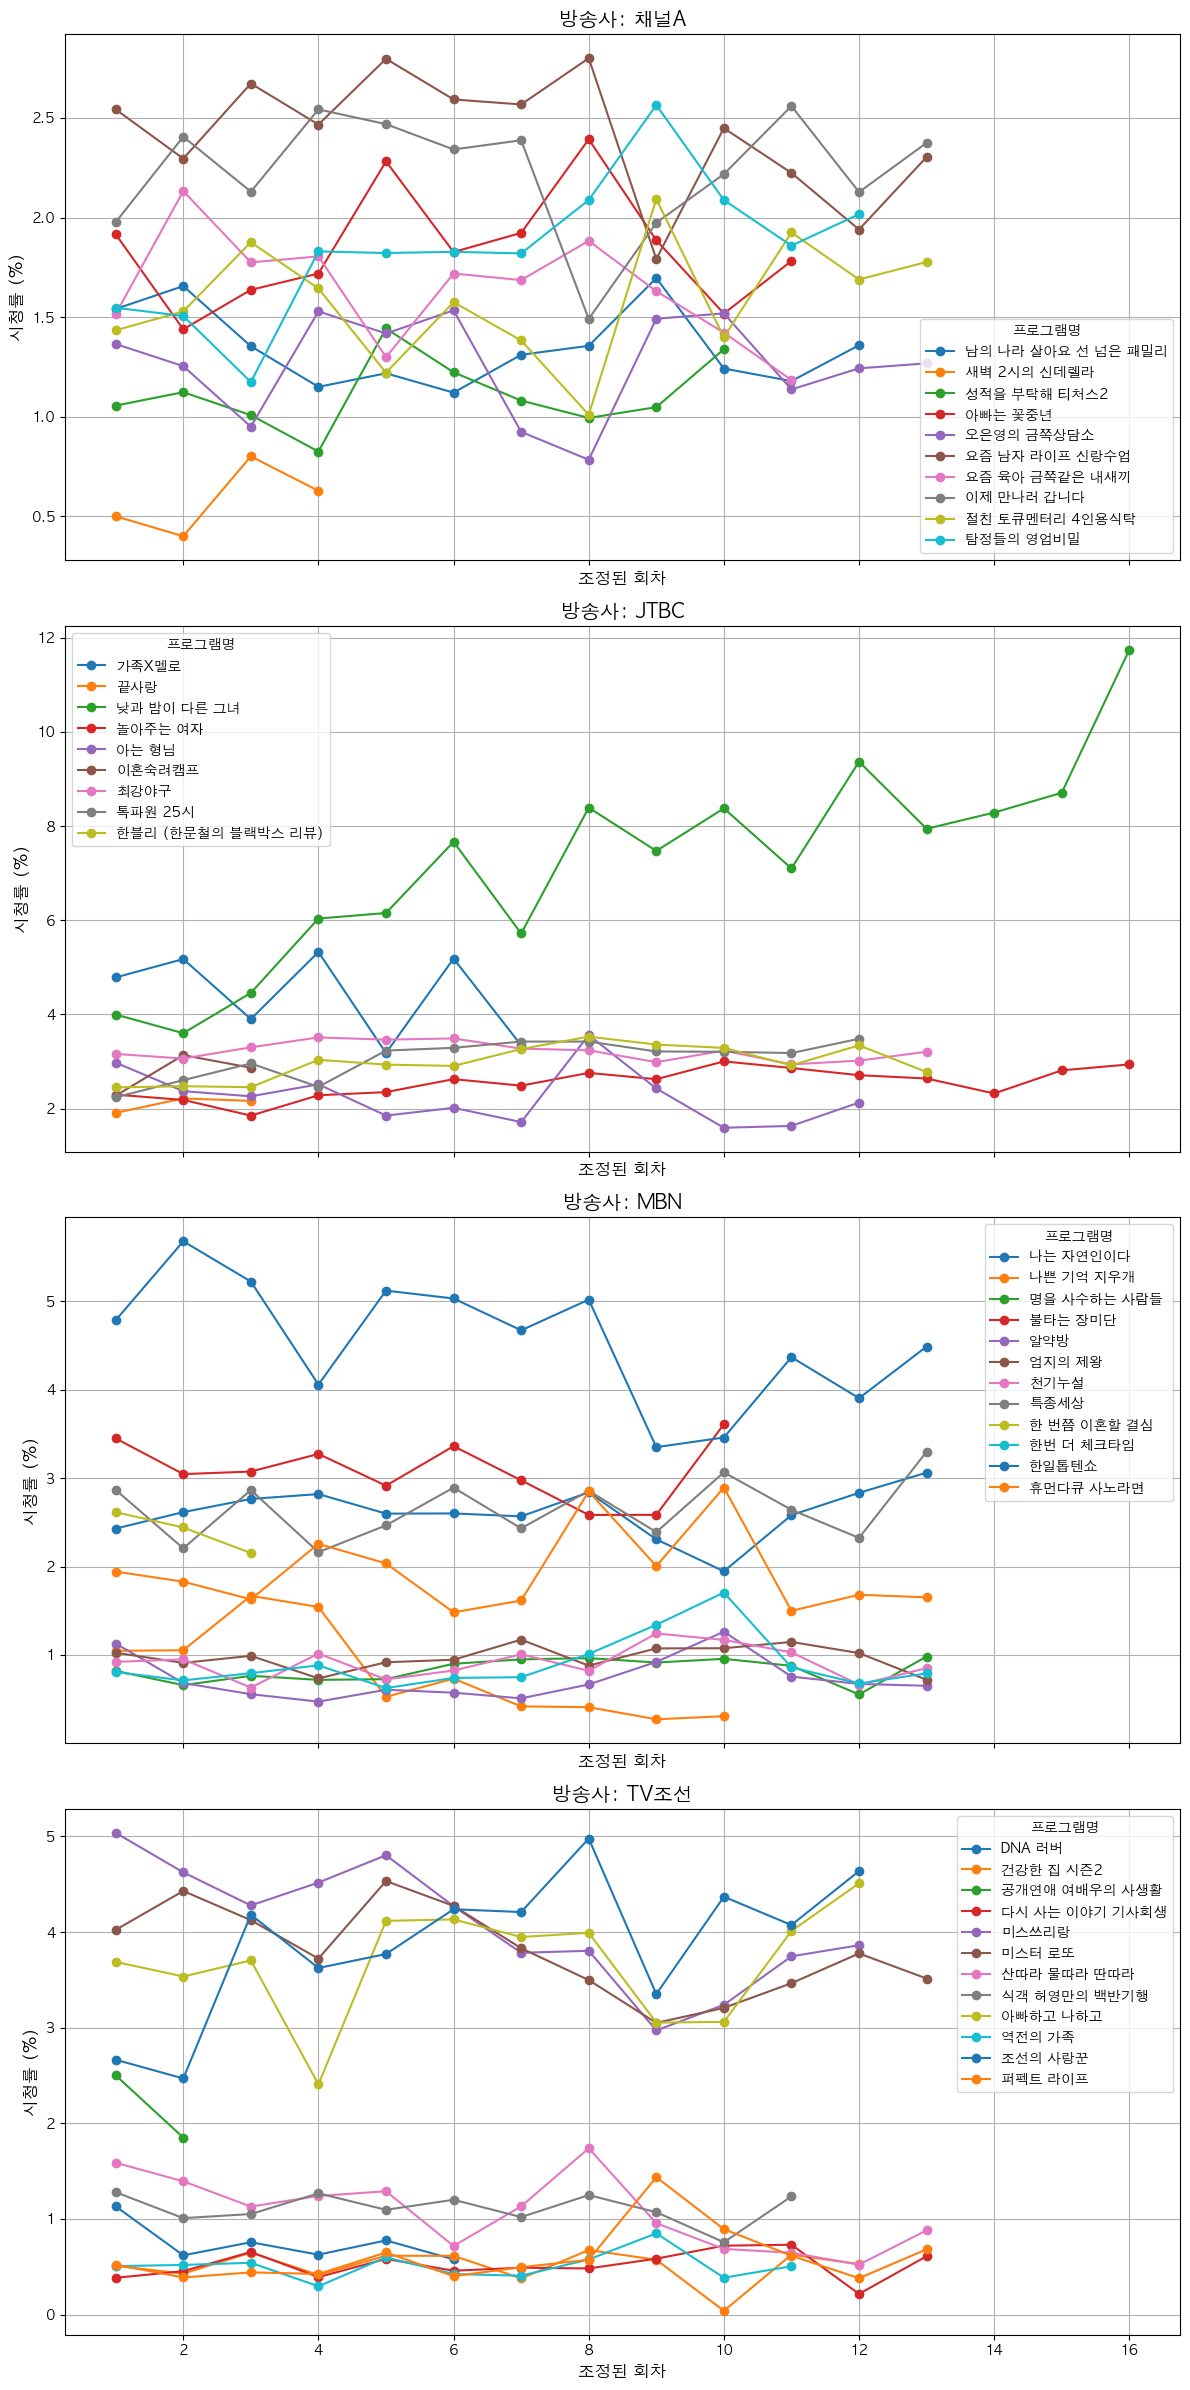

In [7]:
broadcasters = df['방송사'].unique()


df.sort_values(by=['제목', '방영일'], inplace=True)

df['조정된 회차'] = df.groupby('제목').cumcount() + 1

fig, axes = plt.subplots(len(broadcasters), 1, figsize=(12, 6 * len(broadcasters)), sharex=True)

for i, broadcaster in enumerate(broadcasters):
    broadcaster_data = df[df['방송사'] == broadcaster]
    for title in broadcaster_data['제목'].unique():
        program_data = broadcaster_data[broadcaster_data['제목'] == title]
        axes[i].plot(program_data['조정된 회차'], program_data['시청률'], label=title, marker='o')
    axes[i].set_title(f'방송사: {broadcaster}', fontsize=14)
    axes[i].set_xlabel('조정된 회차', fontsize=12)
    axes[i].set_ylabel('시청률 (%)', fontsize=12)
    axes[i].legend(title='프로그램명')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


### 요일별 시청률 차이

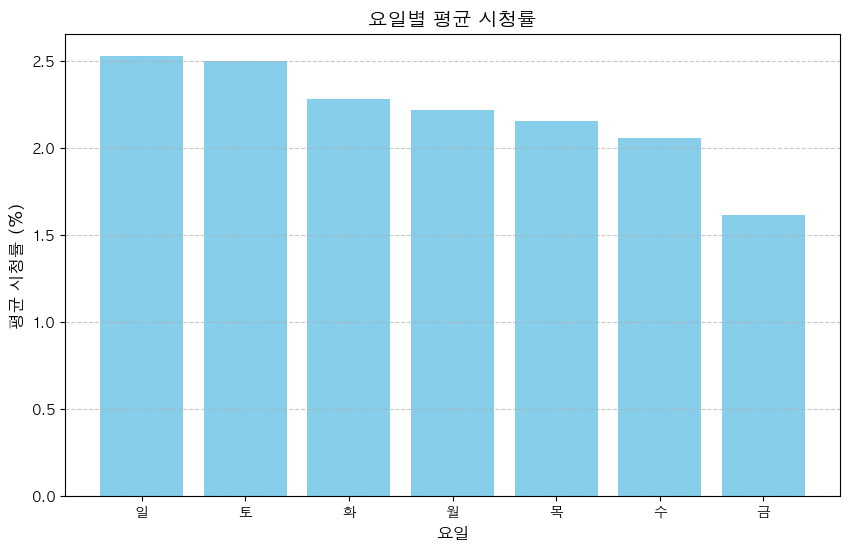

In [8]:
# Grouping data by '요일' and calculating mean viewership for each day
day_of_week_viewership = df.groupby('요일').agg({'시청률': 'mean'}).sort_values(by='시청률', ascending=False)

# Plotting the day of week viewership comparison
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_viewership.index, day_of_week_viewership['시청률'], color='skyblue')
plt.title('요일별 평균 시청률', fontsize=14)
plt.xlabel('요일', fontsize=12)
plt.ylabel('평균 시청률 (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

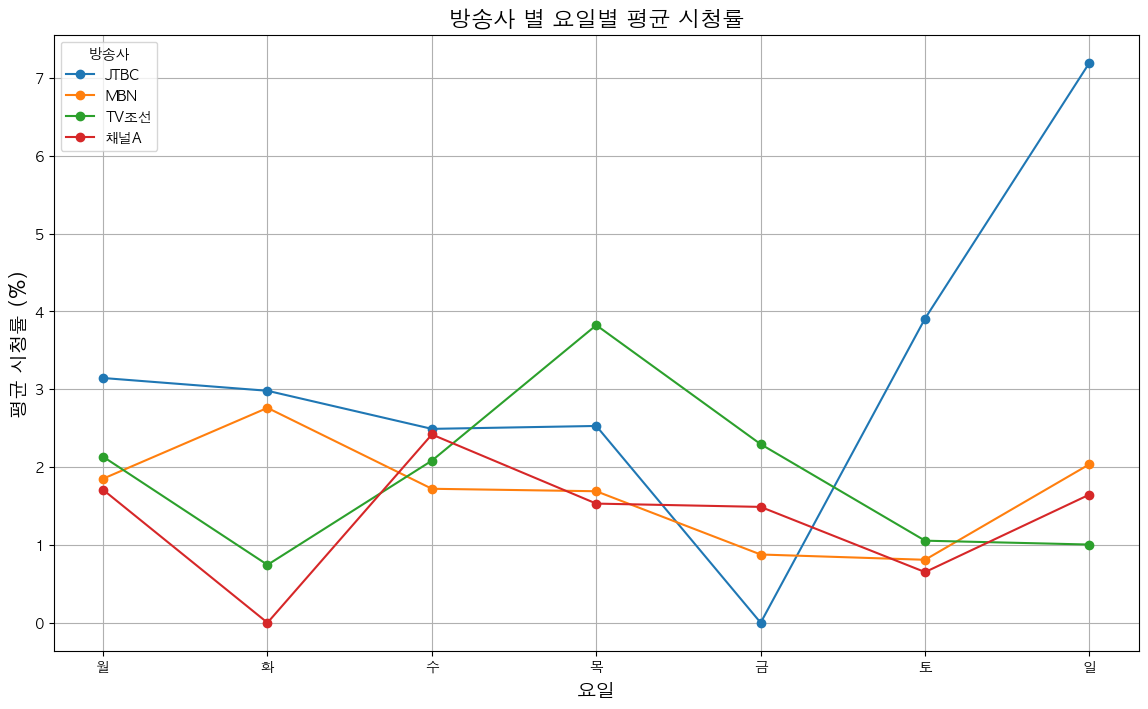

In [9]:
# Grouping data by '방송사', '요일' and calculating mean viewership for each day for each broadcaster
broadcaster_day_viewership = df.groupby(['방송사', '요일']).agg({'시청률': 'mean'}).reset_index()

# Pivot to create a table suitable for plotting
broadcaster_pivot = broadcaster_day_viewership.pivot(index='요일', columns='방송사', values='시청률').fillna(0)

# Ordering days of the week from Monday to Sunday for consistency in plotting
days_order = ['월', '화', '수', '목', '금', '토', '일']
broadcaster_pivot = broadcaster_pivot.reindex(days_order)

# Plotting the day of week viewership comparison for each broadcaster
plt.figure(figsize=(14, 8))
for broadcaster in broadcaster_pivot.columns:
    plt.plot(broadcaster_pivot.index, broadcaster_pivot[broadcaster], marker='o', label=broadcaster)

plt.title('방송사 별 요일별 평균 시청률', fontsize=16)
plt.xlabel('요일', fontsize=14)
plt.ylabel('평균 시청률 (%)', fontsize=14)
plt.grid(True)
plt.legend(title='방송사')
plt.show()